https://twitter.com/octonion/status/1677180241293312000  
https://twitter.com/octonion/status/1677349732014751745  


<img src="img/capture.png"></img>

In [35]:
import math
import random

import numpy as np
import seaborn as sns
from scipy.stats import hypergeom

In [11]:
init_tag_bass = 70
init_tag_trout = 30

tag_bass = 15
untag_bass = 60
tag_trout = 5
untag_trout = 20

In [12]:
(tag_bass + tag_trout) / 100

0.2

$\frac{20}{100} = \frac{100}{x} $, x = total fish

In [13]:
total_fish = 100 * 100 / 20
print(total_fish)

500.0


In [14]:
bass_pct = (init_tag_bass + tag_bass + untag_bass) / 200
print(bass_pct)

0.725


In [15]:
print("Est. total bass in the lake: {}".format(total_fish * bass_pct))
print("Est. total trout in the lake: {}".format(total_fish * (1 - bass_pct)))

Est. total bass in the lake: 362.5
Est. total trout in the lake: 137.5


This is the "Lincoln–Petersen estimator"  
https://en.wikipedia.org/wiki/Mark_and_recapture#Lincoln%E2%80%93Petersen_estimator  

### Chris Long solution
https://twitter.com/octonion/status/1679032235549155330

In [16]:
b = init_tag_bass * untag_bass / tag_bass
t = init_tag_trout * untag_trout / tag_trout
print("Est. total bass in the lake: {}".format(b))
print("Est. total trout in the lake: {}".format(t))

Est. total bass in the lake: 280.0
Est. total trout in the lake: 120.0


https://twitter.com/octonion/status/1677340891923488768  
https://twitter.com/octonion/status/1678181931731542026  
https://twitter.com/octonion/status/1678658766646943746  
https://twitter.com/octonion/status/1678660284066459650  
https://twitter.com/octonion/status/1678662340407902209  

"For a study 24 fish are caught, tagged, and released back into a large pond containing fish. A few days later, 19 fish are caught from the pond and 3 have tags. Estimate the number of fish in the pond.  

In [17]:
n = 24
K = 19
k = 3

### Lincoln–Petersen
$ N = \frac{nK}{k} $

In [18]:
N_est = n * K / k
print(N_est)

152.0


### Chapman 
$ N = \frac{(n+1)(K+1)}{k+1} - 1  $

In [19]:
N_est_chapman = ((n + 1) * (K + 1)) / (k + 1) - 1
print(N_est_chapman)

124.0


### Bayesian 
$ N \approx \mu \pm \sqrt{\mu\epsilon} $  
$ \mu = \frac{(n-1)(K-1)}{k-2} $  
$ \epsilon = \frac{(n-k+1)(K-k+1)}{(k-2)(k-3)} $

In [20]:
# mean = ((n-1)*(K-1))/(k-2)
# std_dev = ((n-k+1)*(K-k+1))/((k-2)*(k-3))
# print(mean, std_dev)

# Can't use - need k > 3 for std_dev calc

In [21]:
# TODO: calculate and understand Confidence interval

## Simulation

<AxesSubplot:ylabel='Count'>

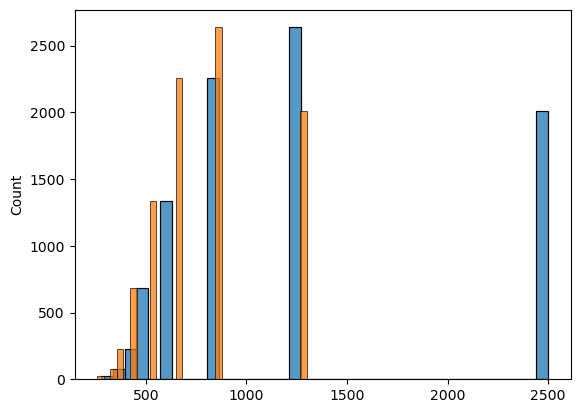

In [22]:
N = 1000  # real population count
n = 50  # fish marked in capture
K = 50  # fish caught in recapture

pop = [0] * N
pop = [1 if i < n else 0 for i in range(len(pop))]

lp_estimates = []
c_estimates = []
sims = 10_000

for i in range(0, sims):
    k = random.sample(pop, K).count(1)
    if k != 0:
        N_est = n * K / k
        N_est_chapman = ((n + 1) * (K + 1)) / (k + 1) - 1
        lp_estimates.append(N_est)
        c_estimates.append(N_est_chapman)

sns.histplot(lp_estimates)
sns.histplot(c_estimates)

### Increase markings

<AxesSubplot:ylabel='Count'>

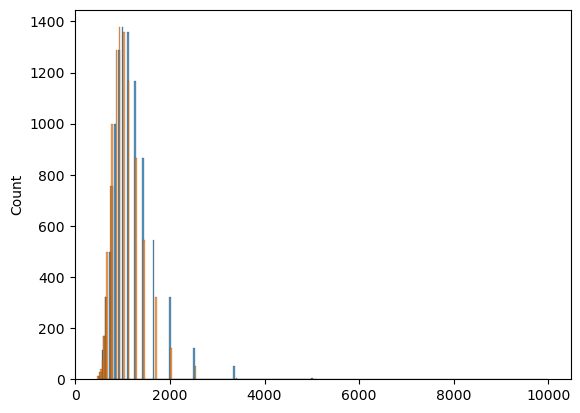

In [23]:
N = 1000  # real population count
n = 100  # fish marked in capture
K = 100  # fish caught in recapture

pop = [0] * N
pop = [1 if i < n else 0 for i in range(len(pop))]

lp_estimates = []
c_estimates = []
sims = 10_000

for i in range(0, sims):
    k = random.sample(pop, K).count(1)
    if k != 0:
        N_est = n * K / k
        N_est_chapman = ((n + 1) * (K + 1)) / (k + 1) - 1
        lp_estimates.append(N_est)
        c_estimates.append(N_est_chapman)

sns.histplot(lp_estimates)
sns.histplot(c_estimates)

<AxesSubplot:ylabel='Count'>

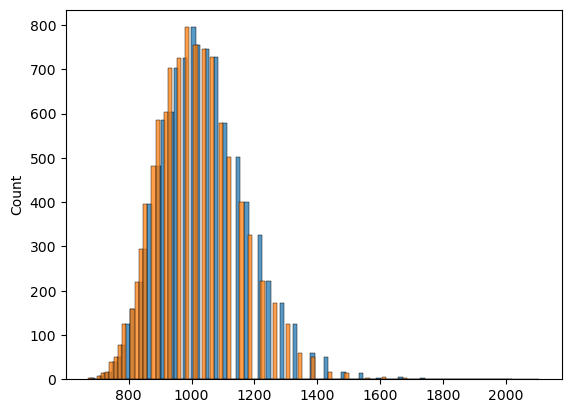

In [24]:
N = 1000  # real population count
n = 200  # fish marked in capture
K = 200  # fish caught in recapture

pop = [0] * N
pop = [1 if i < n else 0 for i in range(len(pop))]

lp_estimates = []
c_estimates = []
sims = 10_000

for i in range(0, sims):
    k = random.sample(pop, K).count(1)
    if k != 0:
        N_est = n * K / k
        N_est_chapman = ((n + 1) * (K + 1)) / (k + 1) - 1
        lp_estimates.append(N_est)
        c_estimates.append(N_est_chapman)

sns.histplot(lp_estimates)
sns.histplot(c_estimates)

### https://twitter.com/octonion/status/1679301870471217154

In [25]:
n = 948
K = 421
k = 167
N_est_chapman = ((n + 1) * (K + 1)) / (k + 1) - 1
print(N_est_chapman)

2382.7976190476193


### Confidence Interval
https://twitter.com/octonion/status/1679325585259069448

In [27]:
mean = random.random()  # Generate a random number between 0 and 1

print("Our unknown mean: ", mean)

# Use the mean to create a normal distribution
variance = 1
standard_deviation = variance**0.5

Our unknown mean:  0.3361907097282961


In [31]:
n = 1000
samples = []

for i in range(0, n):
    random_number = random.normalvariate(mean, standard_deviation)
    samples.append(random_number)

sample_mean = sum(samples) / len(samples)
print("Sample Mean:", sample_mean)

Sample Mean: 0.3323728701769028


In [32]:
def calculate_interval(u, n, z, p):
    """
    Calculate the interval bounds for a given mean, sample size, z-score, and probability.

    Args:
        u (float): Mean value
        n (int): Sample size
        z (float): Z-score
        p (float): Probability

    Returns:
        tuple: Lower and upper bounds of the interval
    """
    standard_error = z / math.sqrt(n)
    lower_bound = u - standard_error
    upper_bound = u + standard_error
    return lower_bound, upper_bound

In [33]:
# Example usage
z = 1.96  # Z-score for a 95% confidence level (p = 0.95)
lower, upper = calculate_interval(sample_mean, n, z, 0.95)
print("Interval bounds:", lower, upper)

Interval bounds: 0.2703922280376026 0.394353512316203


### Mark and recapture confidence interval
https://twitter.com/octonion/status/1679332771439706112

In [37]:
# Code from: https://github.com/octonion/puzzles/blob/master/twitter/fish/exact_ci.py

# n - unknown population size

# Desired confidence level
p = 95 / 100

# Marked in first group
m = 24
# Caught in second group
c = 19
# Tagged in second group
t = 3

print("Lincoln-Petersen estimator = ", (m * c / t))
print("Chapman estimator = ", ((m + 1) * (c + 1) / (t + 1) - 1))

lower = None
upper = None
for n in range(m + c - t, 20000):
    n_lower = hypergeom.ppf(1 / 2 - p / 2, n, m, c)
    n_upper = hypergeom.ppf(1 / 2 + p / 2, n, m, c)
    # print(n_lower,n_upper)
    if lower == None and round(n_lower) == t:
        lower = n
    if upper == None and round(n_upper) == t:
        upper = n
        break

print(p, "-level confidence interval is (", lower, upper, ")")

p = 0 / 100

lower = None
upper = None
for n in range(m + c - t, 20000):
    n_lower = hypergeom.ppf(1 / 2 - p / 2, n, m, c)
    n_upper = hypergeom.ppf(1 / 2 + p / 2, n, m, c)
    # print(n_lower,n_upper)
    if lower == None and round(n_lower) == t:
        lower = n
    if upper == None and round(n_upper) == t:
        upper = n
        break

print("Squeezed estimator bounds = (", lower, upper, ")")

Lincoln-Petersen estimator =  152.0
Chapman estimator =  124.0
0.95 -level confidence interval is ( 67 381 )
Squeezed estimator bounds = ( 128 128 )
